In [1]:
from pycaret.classification import *
import pandas as pd
import os
import wandb

os.chdir('/home/antoine/gene_pheno_pred')
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["WANDB_API_KEY"]="4e5748d6c6f3917c78cdc38a516a1bac776faf58"
wandb.login()
wandb.init(
    project="cigap-classif",
)


wandb: Currently logged in as: antoine-toffano (mlb). Use `wandb login --relogin` to force relogin


In [2]:
train = pd.read_csv('/home/antoine/gene_pheno_pred/TorusE_2023-03-31_14-41-37_train.csv' , header=0)
#train = train.drop(index=train.index[25:])
# identify the unique values in the 'ground_truth' column
unique_ids = train['ground_truth'].value_counts()[train['ground_truth'].value_counts() == 1].index

# filter out the rows with unique 'ground_truth' values
train = train[~train['ground_truth'].isin(unique_ids)]
train

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,ground_truth
0,0.000036,-0.005839,0.000036,-0.000036,-0.005839,0.000036,-0.000036,-0.000036,-0.000036,-0.000036,...,0.020859,-0.021720,-0.002635,-0.021803,-0.023519,0.019338,0.002390,-0.025528,-0.003180,http://www.semanticweb.org/needed-terms#001
1,-0.002563,0.004352,-0.000925,-0.002781,-0.003307,-0.006591,0.007723,0.000900,0.002940,-0.001755,...,-0.026561,-0.026467,0.011546,0.007113,0.029829,0.014343,-0.002327,0.024326,-0.010424,http://semanticscience.org/resource/SIO_001279
2,0.000291,0.000291,-0.003586,0.000291,0.003586,-0.003586,0.000291,-0.000291,0.003586,0.000291,...,0.002584,-0.002584,-0.002843,-0.002584,-0.002584,0.002584,0.002843,-0.002584,-0.002843,no_link_known
3,-0.001707,0.000702,-0.001692,-0.002502,0.000112,-0.004317,-0.000159,-0.000713,0.004310,0.002457,...,0.024196,-0.025993,-0.007683,-0.023339,-0.023716,0.022958,0.009925,-0.030913,-0.006875,http://www.semanticweb.org/needed-terms#001
4,0.002947,-0.002712,-0.003596,0.001877,0.003449,0.003197,-0.002988,0.004427,0.003860,0.002470,...,-0.037756,-0.021971,0.015067,-0.036230,0.034744,0.031243,0.053082,0.042770,0.049509,http://semanticscience.org/resource/SIO_001279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364931,-0.001504,-0.001504,-0.001504,0.001504,-0.001504,-0.001504,0.001504,0.001504,0.001504,0.001504,...,0.016140,-0.025934,-0.008050,-0.023769,-0.021450,0.023729,0.008236,-0.023763,-0.008058,http://www.semanticweb.org/needed-terms#001
2364932,0.006778,0.001943,0.001943,0.010295,0.006778,-0.005460,-0.006778,-0.001943,0.010295,0.010295,...,-0.010916,0.015125,-0.016395,0.014115,0.011327,-0.010299,0.015740,0.014983,-0.004980,no_link_known
2364933,-0.003663,-0.007995,-0.002343,0.002343,-0.003663,0.001989,-0.001989,0.007995,0.002343,0.002343,...,-0.053474,0.018565,0.041466,-0.058139,0.033773,0.038972,0.043669,-0.018444,0.033126,no_link_known
2364934,-0.010859,-0.007195,-0.002744,-0.005639,-0.009460,0.000825,-0.002338,0.005121,0.000990,-0.002317,...,0.013257,-0.010965,-0.013171,-0.013267,-0.013147,0.013259,0.013239,-0.013260,-0.011003,http://www.semanticweb.org/needed-terms#001


In [3]:
s = setup(train, target = 'ground_truth', fold_strategy = 'stratifiedkfold', fold=2, n_jobs=5, train_size = 0.8, system_log=True, use_gpu = True, log_experiment='wandb')
exp = ClassificationExperiment()

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recomp

,Description,Value
0,Session id,7125
1,Target,ground_truth
2,Target type,Multiclass
3,Target mapping,"http://semanticscience.org/resource/SIO_000281: 0, http://semanticscience.org/resource/SIO_000628: 1, http://semanticscience.org/resource/SIO_001279: 2, http://www.semanticweb.org/needed-terms#001: 3, http://www.semanticweb.org/needed-terms#002: 4, http://www.semanticweb.org/needed-terms#004: 5, http://www.semanticweb.org/needed-terms#009: 6, http://www.w3.org/1999/02/22-rdf-syntax-ns#label: 7, http://www.w3.org/1999/02/22-rdf-syntax-ns#type: 8, http://www.w3.org/2000/01/rdf-schema#subClassOf: 9, no_link_known: 10"
4,Original data shape,"(2364936, 101)"
5,Transformed data shape,"(2364936, 101)"
6,Transformed train set shape,"(1891948, 101)"
7,Transformed test set shape,"(472988, 101)"
8,Numeric features,100
9,Preprocess,True


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


In [4]:
models()

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
models = compare_models(include = ['mlp', 'gpc', 'rbfsvm', 'lda', 'et', 'dummy'])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:53:59
Status,. . . . . . . . . . . . . . . . . .,Fitting 2 Folds
Estimator,. . . . . . . . . . . . . . . . . .,SVM - Radial Kernel


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
mlp,MLP Classifier,0.9523,0.9919,0.9523,0.9541,0.9524,0.9311,0.9318,5168.5550


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

TypeError: Drawing.draw() got an unexpected keyword argument 'ax'

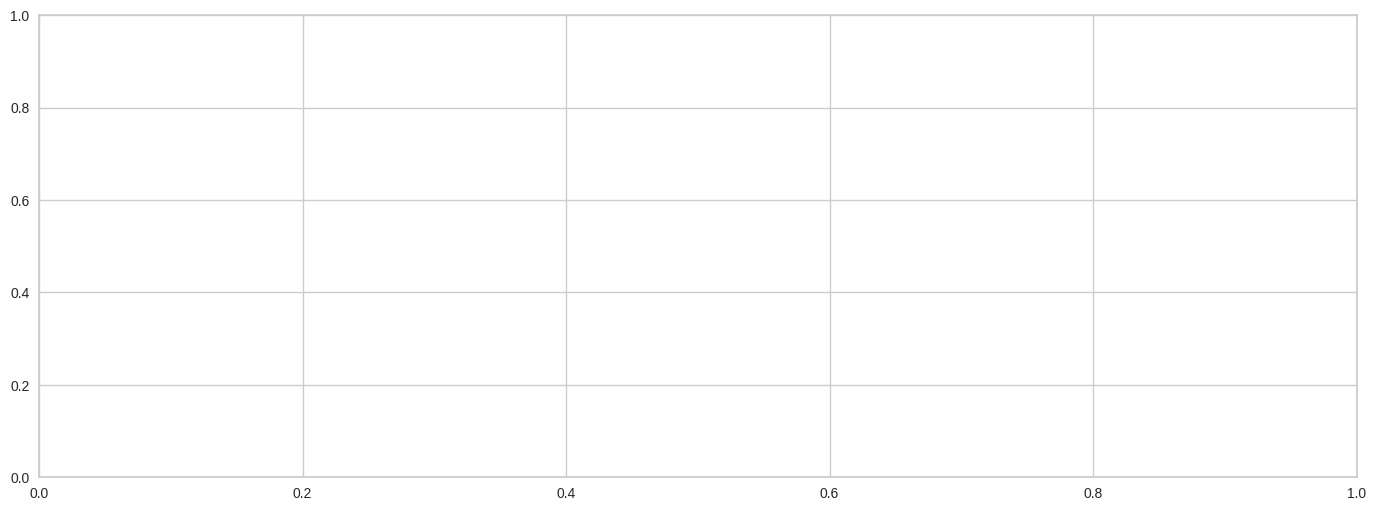

In [6]:
plot_model(models, plot = 'pipeline')

In [ ]:
plot_model(models, plot = 'auc')

In [ ]:
plot_model(models, plot = 'threshold')

In [ ]:
plot_model(models, plot = 'pr')

In [ ]:
plot_model(models, plot = 'pr')

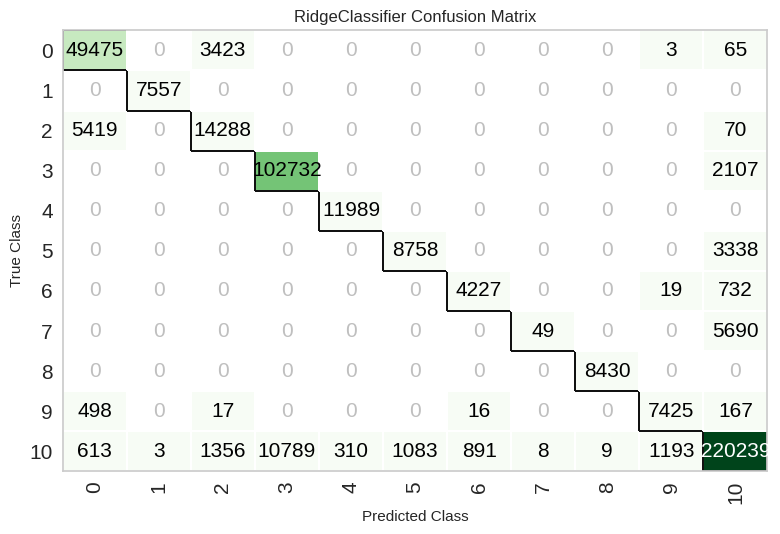

In [7]:
plot_model(models, plot = 'confusion_matrix')

In [ ]:
plot_model(best, plot = 'error')

In [ ]:
plot_model(best, plot = 'class_report')

In [ ]:
plot_model(best, plot = 'boundary')

In [ ]:
plot_model(best, plot = 'rfe')

In [ ]:
plot_model(best, plot = 'learning')

In [ ]:
plot_model(best, plot = 'manifold')

In [ ]:
plot_model(best, plot = 'calibration')

In [ ]:
plot_model(best, plot = 'vc')

In [ ]:
plot_model(best, plot = 'dimension')

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
plot_model(best, plot = 'feature_all')

In [ ]:
plot_model(best, plot = 'parameter')

In [ ]:
plot_model(best, plot = 'lift')

In [ ]:
plot_model(best, plot = 'gain')

In [ ]:
plot_model(best, plot = 'tree')

In [ ]:
plot_model(best, plot = 'ks')

In [ ]:
evaluate_model(best)

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

In [ ]:
# show predictions df
holdout_pred.head()

In [ ]:
# copy data and drop Class variable

val = pd.read_csv('/home/antoine/gene_pheno_pred/TorusE_2023-03-31_14-41-37_test.csv' , header=0)
val.drop('gound_truth', axis=1, inplace=True)
val.head()

In [ ]:
# predict model on new_data
predictions = predict_model(best, data = val)
predictions.head()

In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline